In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import res.fnn.training as training
import res.process_data.process_raw_data as prd
import res.process_data.dire_and_coor as dc
import res.process_data.process_output as out
from res.process_data.dataset import tensor_dataset

In [2]:
coordinates_input = prd.read_coordinate(16, '../../data/Coordinates.dat')
directions_input = dc.coordinates_directions_four(coordinates_input)
sincos_input = dc.sin_cos(directions_input)

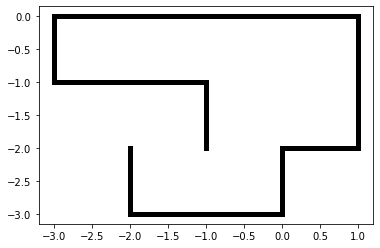

In [5]:
out.plot_polymer(coordinates_input[0])

In [3]:
z_dim = 8
im_dim = 30
hidden_dim = 16
display_step = 50
lr = 0.0003
beta_1 = 0.5
beta_2 = 0.999
c_lambda = 10
disc_repeats = 5
batch_size = 128
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
from res.fnn.generator import Generator
from res.fnn.discriminator import Discriminator

gen, disc, gen_opt, disc_opt = training.initialize_model(z_dim, im_dim, hidden_dim,
                                                         device, lr, beta_1, beta_2)

gen_check_point = torch.load('wgan_sincos_real_gan_10.pth.tar', map_location='cpu')
disc_check_point = torch.load('wgan_sincos_real_disc_10.pth.tar', map_location='cpu')
gen.load_state_dict(gen_check_point['gen_state_dict'])
disc.load_state_dict(disc_check_point['disc_state_dict'])

<All keys matched successfully>

In [ ]:
import res.process_data.process_output as out
